**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


In [6]:
#txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
#vec = dir(txt_fdiry)
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


## Import data

In [9]:
txt_assay = "CRISPRi_FlowFISH_K562_Riley_JinWoo"

lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc", 
        txt_folder, 
        txt_assay,
        "overlap_score",
        "summary"
    )
    #txt_fname = "result.coverage.score.filtered.tsv"
    txt_fname = "region.coverage.score.filtered.merge.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 925   9

$fcc_astarr_macs_input_union
[1] 1330    9



Chrom,ChromStart,ChromEnd,Region,Mean,Mean_Pos,Mean_Neg,Count,Note
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr11,4092109,4092511,chr11:4092109-4092511,-0.12943640,0.00000000,-0.2425928,320,HBE1:320|HBG1:320|HBG2:320|HBS1L:320|MYB:320
chr11,4094223,4095304,chr11:4094223-4095304,-0.04849565,0.09460382,-0.2516657,1030,HBE1:1030|HBG1:1030|HBG2:1030|HBS1L:1030|MYB:1030
chr11,4144721,4147004,chr11:4144721-4147004,-0.07024901,0.00000000,-0.1515237,1185,HBE1:1185|HBG1:1185|HBG2:1185|HBS1L:1185|MYB:1185


In [10]:
lst = lst_dat_region_score_import 
dat = lst[["fcc_astarr_macs_input_union"]]
dat_region_score_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1330    9


Chrom,ChromStart,ChromEnd,Region,Mean,Mean_Pos,Mean_Neg,Count,Note
chr11,4092104,4092566,chr11:4092104-4092566,-0.1340399,0.0000000,-0.2522359,325,HBE1:325|HBG1:325|HBG2:325|HBS1L:325|MYB:325
chr11,4094204,4095676,chr11:4094204-4095676,-0.0482194,0.0585651,-0.2284214,1330,HBE1:1330|HBG1:1330|HBG2:1330|HBS1L:1330|MYB:1330
chr11,4144511,4147030,chr11:4144511-4147030,-0.0702490,0.0000000,-0.1515237,1185,HBE1:1185|HBG1:1185|HBG2:1185|HBS1L:1185|MYB:1185


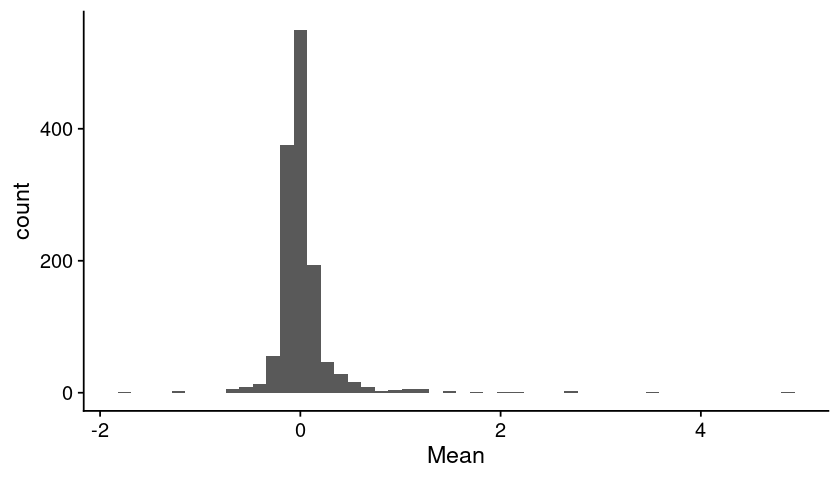

In [12]:
dat = dat_region_score_import
dat = dat %>% dplyr::mutate(ZScore = scale(Mean))

gpt = ggplot(dat, aes(x=Mean)) + geom_histogram(bins = 50) + theme_cowplot()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

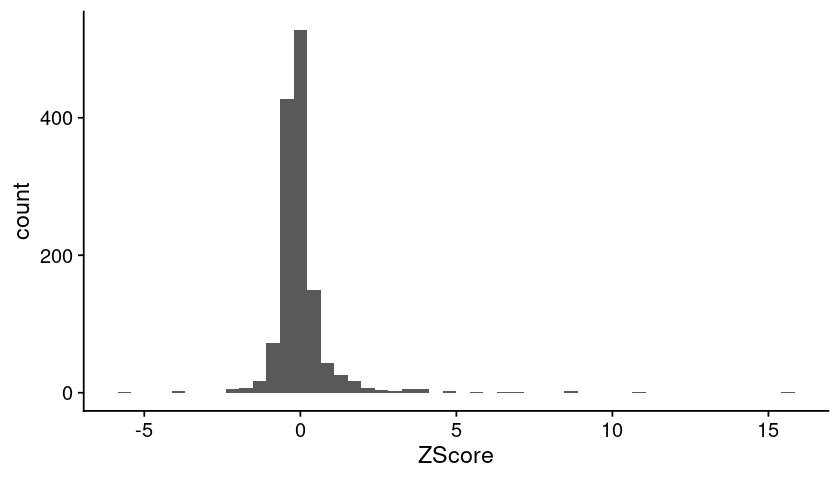

In [13]:
dat = dat_region_score_import
dat = dat %>% dplyr::mutate(ZScore = scale(Mean))

gpt = ggplot(dat, aes(x=ZScore)) + geom_histogram(bins = 50) + theme_cowplot()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)